<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

## Python Programming:Regression using Neural Networks

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import an Multi-Layer Perceptron Regressor model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn import metrics


### Example 1

In this example we are going to use a dataset that we've have worked with before for the purpose of comparing the perfomance of the model.

Remember the example we looked at while doing linear regression, we'll tackle the same problem but now using neural networks. 

To refresh your mind, we were trying to predict a students chance of getting into grad school based on some tests.

Let's dive in!!

**Loading data**

In [ ]:
#load the data
data = pd.read_csv('http://bit.ly/uni_admission')
data.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Using 1 feauture
First, we'll use only 1 feature and see how it performs then, we'll go ahead and increase the number of features.

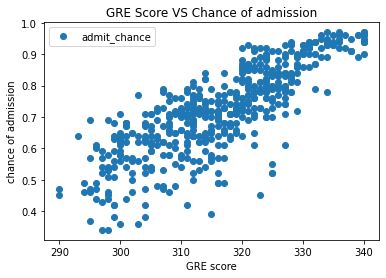

In [ ]:
# First, we'll use the GRE test scores to predict

X = data['GRE']
y = data['admit_chance']


data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()

In [ ]:
# Split the dataset into train and test set
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

# Just like we did in the classifier, we need to normalize our data

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train.values.reshape(-1,1)) 
# Here, we are using reshape because normally the scaler expects a 2D array 
# but we have given it a 1D array instead. 
# So we reshape the array and tell it that we have 1 array and an unknown number rows,

# Applying the transformation to the data
X_train = scaler.transform(X_train.values.reshape(-1,1))

X_test = scaler.transform(X_test.values.reshape(-1,1))


**Training the Model**

Similar to the model classifier, the regressor also using the same parameters.

In [ ]:
# Instatiating the model
mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity')
#Since we are doing a linear regression then we don't really need the activation function 
# so we use activation as identity

# fitting the model
mlp.fit(X_train,y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

**Prediction**

In [ ]:
# Predicting
y_pred = mlp.predict(X_test.reshape(-1,1))

In [ ]:
pd.DataFrame(
    {
        "Actual":y_test,
        "Predicted":y_pred,
    }
)

,Actual,Predicted
285,0.93,0.858848
102,0.62,0.689853
148,0.96,0.938375
487,0.79,0.819085
388,0.49,0.510917
...,...,...
216,0.91,0.769380
241,0.65,0.719676
369,0.67,0.560622
311,0.84,0.829026


**Visualization**

Since we are using only 1 feature, we can easily visualize the results

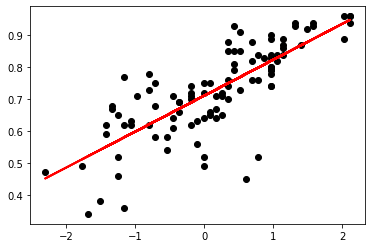

In [ ]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

**Evaluaton**


In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 0.0656814547899631
Mean Squared Error: 0.008005721635740764
Root Mean Squared Error: 0.08947469829924415


#### Using Muiltiple feautures

In [ ]:
# Seperating our target from our features
X = data[['GRE','TOEFL']].values
y = data['admit_chance']

In [ ]:
# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 20)

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train )

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


**Model Training**


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity')

# Fitting the model
mlp.fit(X_train,y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

**Prediction**

In [ ]:
# Making predictions
y_pred = mlp.predict(X_test)

In [ ]:
pd.DataFrame(
    {
        "Actual":y_test,
        "Predicted":y_pred,
    }
)

,Actual,Predicted
285,0.93,0.899654
102,0.62,0.690993
148,0.96,0.902301
487,0.79,0.878027
388,0.49,0.502304
...,...,...
216,0.91,0.815462
241,0.65,0.631075
369,0.67,0.524262
311,0.84,0.736232


**Model Evaluation**

In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.0739637123123682
Mean Squared Error: 0.00808648028364444
Root Mean Squared Error: 0.089924859097162


**Conclusion**

We can conclude that there is a slight improvement when using multiple features. This is refected by the decrease in the RMSE.

Remember, you can always tune your parameters for better results

### <font color='green'>Challenge</font>

In [ ]:
# Use NN to predict a persons salary based on their experience
# Dataset url ------> http://bit.ly/salary_dataset